#Loading the Dataset


In [6]:
!pip install openpyxl
import pandas as pd
from google.colab import drive

drive.mount('/content/drive/')
df = pd.read_excel("/content/drive/MyDrive/dataset.xlsx")

df.shape
df.head(20)
df.info()
df.isnull().sum()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.9 MB/s eta 0:00:00
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                300000 non-null  int64 
 1   date              300000 non-null  object
 2   likes             300000 non-null  int64 
 3   content           300000 non-null  object
 4   username          300000 non-null  object
 5   media             300000 non-null  object
 6   inferred company  300000 non-null  object
dtypes: int64(2), object(5)
memory usage: 16.0+ MB


,0
id,0
date,0
likes,0
content,0
username,0
media,0
inferred company,0


#Data Preprocessing

In [7]:
df.dropna(subset=['content', 'username', 'inferred company', 'likes'], inplace=True)
df['media'].fillna('no_media', inplace=True)
df['has_media'] = df['media'].apply(lambda x: x != 'no_media')
df['content'] = df['content'].astype(str).str.strip().str.lower()
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')

<ipython-input-7-58ea6ea02cfc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['media'].fillna('no_media', inplace=True)


#EDA

<Axes: xlabel='likes', ylabel='Count'>

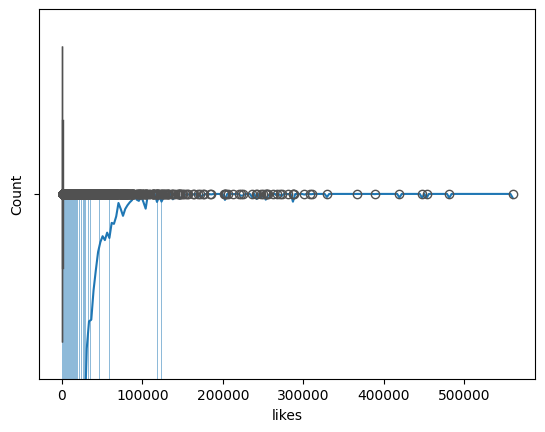

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['likes'], kde=True)
sns.boxplot(x=df['likes'])

As we can clearly see, there are comparatively very few training examples with very high likes. To deal with this, it would be sensible to train the model on the log of the 'likes' rather than the raw value of the likes itself.

<Axes: xlabel='log_likes', ylabel='Count'>

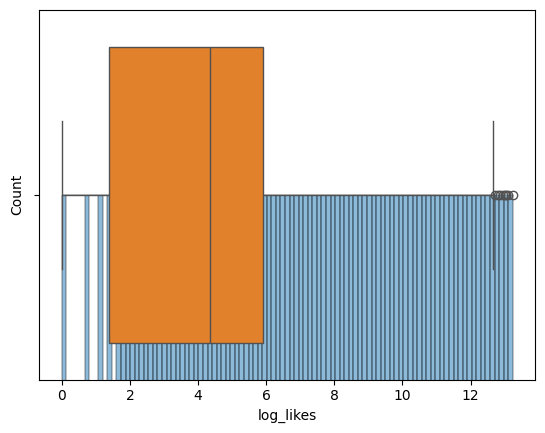

In [9]:
import numpy as np

df['log_likes'] = np.log1p(df['likes'])
sns.histplot(df['log_likes'], kde=True)
sns.boxplot(x=df['log_likes'])

Now the likes are spread much more smoothly

In [10]:
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

In [11]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df['char_count'] = df['content'].apply(len)

In [12]:
df.head(10)

,id,date,likes,content,username,media,inferred company,has_media,datetime,log_likes,hour,day_of_week,word_count,char_count
0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,True,2020-12-12 00:47:00,0.693147,0,Saturday,29,181
1,2,2018-06-30 10:04:20,2750,watch rapper <mention> freestyle for over an h...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-06-30 10:04:20,7.919720,10,Saturday,10,73
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,True,2020-09-29 19:47:28,4.060443,19,Tuesday,14,104
3,4,2020-10-01 11:40:09,152,"1st in europe to be devastated by covid-19, it...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,True,2020-10-01 11:40:09,5.030438,11,Thursday,22,140
4,5,2018-10-19 14:30:46,41,congratulations to pauletha butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-10-19 14:30:46,3.737670,14,Friday,26,199
5,6,2020-11-15 16:01:08,525,an 85-year-old primary school in shanghai has ...,cnni,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,cnn,True,2020-11-15 16:01:08,6.265301,16,Sunday,28,181
6,7,2019-10-24 10:51:03,0,lasu celebrates new dawn of unbroken peace as ...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2019-10-24 10:51:03,0.000000,10,Thursday,16,107
7,8,2018-07-17 22:04:26,3,next week cncf will be publishing a series of ...,CiscoCloud,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,cisco,True,2018-07-17 22:04:26,1.386294,22,Tuesday,35,241
8,9,2019-03-27 12:18:01,572,a 95-year-old world war ii veteran says he was...,cnni,[Photo(previewUrl='https://pbs.twimg.com/media...,cnn,True,2019-03-27 12:18:01,6.350886,12,Wednesday,36,224
9,10,2020-08-01 05:24:03,127,"nicholas hoult, charlize theron, and aisha tyl...",GettyVIP,[Photo(previewUrl='https://pbs.twimg.com/media...,getty images,True,2020-08-01 05:24:03,4.852030,5,Saturday,42,274


This is the current dataset with the initially recommended new useful features engineered for the model

Essentially, we have done minimal preprocessing to make the text all lowercase, and discretize the date data into days of the week and hour of the day, info that a model may be able to use better (as people are more free on let's say weekends and during the evening time)

Now, the content, the company, the media, and the day fields are text fields, which are of no use to a model, as it can only ingest numbers. That shall be the next piece of the puzzle to solve

Handling Day of the week

This is pretty easy to solve, we can use one hot embedding for this

In [13]:
# one_hot = pd.get_dummies(df['day_of_week'], prefix='day')

# df = pd.concat([df, one_hot], axis=1)
# df.head(10)
#The above format works but does not allow for reproduction of the same encoding
#at the API level during prediction time. Therefore, this is not ideal

from sklearn.preprocessing import OneHotEncoder
import joblib

day_encoder = OneHotEncoder(sparse_output=False)
day_one_hot_encoded = day_encoder.fit_transform(df[['day_of_week']])

joblib.dump(day_encoder, '/content/drive/My Drive/day_encoder.pkl')

df[day_encoder.categories_[0]] = day_one_hot_encoded
df.head(10)

,id,date,likes,content,username,media,inferred company,has_media,datetime,log_likes,...,day_of_week,word_count,char_count,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,True,2020-12-12 00:47:00,0.693147,...,Saturday,29,181,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,2018-06-30 10:04:20,2750,watch rapper <mention> freestyle for over an h...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-06-30 10:04:20,7.919720,...,Saturday,10,73,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,True,2020-09-29 19:47:28,4.060443,...,Tuesday,14,104,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,2020-10-01 11:40:09,152,"1st in europe to be devastated by covid-19, it...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,True,2020-10-01 11:40:09,5.030438,...,Thursday,22,140,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,2018-10-19 14:30:46,41,congratulations to pauletha butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-10-19 14:30:46,3.737670,...,Friday,26,199,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,2020-11-15 16:01:08,525,an 85-year-old primary school in shanghai has ...,cnni,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,cnn,True,2020-11-15 16:01:08,6.265301,...,Sunday,28,181,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,7,2019-10-24 10:51:03,0,lasu celebrates new dawn of unbroken peace as ...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2019-10-24 10:51:03,0.000000,...,Thursday,16,107,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,8,2018-07-17 22:04:26,3,next week cncf will be publishing a series of ...,CiscoCloud,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,cisco,True,2018-07-17 22:04:26,1.386294,...,Tuesday,35,241,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,9,2019-03-27 12:18:01,572,a 95-year-old world war ii veteran says he was...,cnni,[Photo(previewUrl='https://pbs.twimg.com/media...,cnn,True,2019-03-27 12:18:01,6.350886,...,Wednesday,36,224,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10,2020-08-01 05:24:03,127,"nicholas hoult, charlize theron, and aisha tyl...",GettyVIP,[Photo(previewUrl='https://pbs.twimg.com/media...,getty images,True,2020-08-01 05:24:03,4.852030,...,Saturday,42,274,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Now in the 'media' feature, each individual piece of media is probably too much information, and so instead we can just extract the 'type' of media, i.e. video, photo, GIF etc.

In [14]:
import re

unique_media = set()

for entry in df['media']:
    match = re.search(r'\[(.*?)\(', entry)
    if match:
        media_str = match.group(1).strip()
        unique_media.add(media_str)

print(unique_media)

{'Video', 'Photo', 'Gif'}


This tells us that consistently throughout the dataset, there are only three types of media, that is a Video, a GIF and a photo, and nothing else like a hyperlink let's say.

We may also check if there exists any entry for which it has no media

In [15]:
false_count = (df['has_media'] == False).sum()
print(false_count)


0


Now, we will append a new column 'media_type', which goes through every entry, and classifies it as either of the three categories. Since we have no data for which we do not have media, a separate container for none will basically be useless

In [16]:
df['media_type'] = df['media'].apply(
    lambda x: re.search(r'\[(.*?)\(', x).group(1).strip() if pd.notna(x) and re.search(r'\[(.*?)\(', x) else None
)

df.head(20)

,id,date,likes,content,username,media,inferred company,has_media,datetime,log_likes,...,word_count,char_count,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,media_type
0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,True,2020-12-12 00:47:00,0.693147,...,29,181,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Photo
1,2,2018-06-30 10:04:20,2750,watch rapper <mention> freestyle for over an h...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-06-30 10:04:20,7.919720,...,10,73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Photo
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,True,2020-09-29 19:47:28,4.060443,...,14,104,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Photo
3,4,2020-10-01 11:40:09,152,"1st in europe to be devastated by covid-19, it...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,True,2020-10-01 11:40:09,5.030438,...,22,140,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Photo
4,5,2018-10-19 14:30:46,41,congratulations to pauletha butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-10-19 14:30:46,3.737670,...,26,199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Photo
5,6,2020-11-15 16:01:08,525,an 85-year-old primary school in shanghai has ...,cnni,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,cnn,True,2020-11-15 16:01:08,6.265301,...,28,181,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Video
6,7,2019-10-24 10:51:03,0,lasu celebrates new dawn of unbroken peace as ...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2019-10-24 10:51:03,0.000000,...,16,107,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Photo
7,8,2018-07-17 22:04:26,3,next week cncf will be publishing a series of ...,CiscoCloud,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,cisco,True,2018-07-17 22:04:26,1.386294,...,35,241,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Video
8,9,2019-03-27 12:18:01,572,a 95-year-old world war ii veteran says he was...,cnni,[Photo(previewUrl='https://pbs.twimg.com/media...,cnn,True,2019-03-27 12:18:01,6.350886,...,36,224,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Photo
9,10,2020-08-01 05:24:03,127,"nicholas hoult, charlize theron, and aisha tyl...",GettyVIP,[Photo(previewUrl='https://pbs.twimg.com/media...,getty images,True,2020-08-01 05:24:03,4.852030,...,42,274,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Photo


In [17]:
pd.set_option('display.max_columns', None)

In [18]:
df.head(20)

,id,date,likes,content,username,media,inferred company,has_media,datetime,log_likes,hour,day_of_week,word_count,char_count,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,media_type
0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,True,2020-12-12 00:47:00,0.693147,0,Saturday,29,181,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Photo
1,2,2018-06-30 10:04:20,2750,watch rapper <mention> freestyle for over an h...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-06-30 10:04:20,7.919720,10,Saturday,10,73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Photo
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,True,2020-09-29 19:47:28,4.060443,19,Tuesday,14,104,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Photo
3,4,2020-10-01 11:40:09,152,"1st in europe to be devastated by covid-19, it...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,True,2020-10-01 11:40:09,5.030438,11,Thursday,22,140,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Photo
4,5,2018-10-19 14:30:46,41,congratulations to pauletha butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-10-19 14:30:46,3.737670,14,Friday,26,199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Photo
5,6,2020-11-15 16:01:08,525,an 85-year-old primary school in shanghai has ...,cnni,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,cnn,True,2020-11-15 16:01:08,6.265301,16,Sunday,28,181,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Video
6,7,2019-10-24 10:51:03,0,lasu celebrates new dawn of unbroken peace as ...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2019-10-24 10:51:03,0.000000,10,Thursday,16,107,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Photo
7,8,2018-07-17 22:04:26,3,next week cncf will be publishing a series of ...,CiscoCloud,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,cisco,True,2018-07-17 22:04:26,1.386294,22,Tuesday,35,241,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Video
8,9,2019-03-27 12:18:01,572,a 95-year-old world war ii veteran says he was...,cnni,[Photo(previewUrl='https://pbs.twimg.com/media...,cnn,True,2019-03-27 12:18:01,6.350886,12,Wednesday,36,224,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Photo
9,10,2020-08-01 05:24:03,127,"nicholas hoult, charlize theron, and aisha tyl...",GettyVIP,[Photo(previewUrl='https://pbs.twimg.com/media...,getty images,True,2020-08-01 05:24:03,4.852030,5,Saturday,42,274,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Photo


Now we one-hot embed the media_type vector

In [19]:
# one_hot = pd.get_dummies(df['media_type'], prefix='media')
# df = pd.concat([df, one_hot], axis =1)
# df.head(10)

media_type_encoder = OneHotEncoder(sparse_output=False)
media_type_one_hot_encoded = media_type_encoder.fit_transform(df[['media_type']])

joblib.dump(media_type_encoder, '/content/drive/My Drive/media_type_encoder.pkl')

df[media_type_encoder.categories_[0]] = media_type_one_hot_encoded
df.head(10)

,id,date,likes,content,username,media,inferred company,has_media,datetime,log_likes,hour,day_of_week,word_count,char_count,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,media_type,Gif,Photo,Video
0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,True,2020-12-12 00:47:00,0.693147,0,Saturday,29,181,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Photo,0.0,1.0,0.0
1,2,2018-06-30 10:04:20,2750,watch rapper <mention> freestyle for over an h...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-06-30 10:04:20,7.919720,10,Saturday,10,73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Photo,0.0,1.0,0.0
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,True,2020-09-29 19:47:28,4.060443,19,Tuesday,14,104,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Photo,0.0,1.0,0.0
3,4,2020-10-01 11:40:09,152,"1st in europe to be devastated by covid-19, it...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,True,2020-10-01 11:40:09,5.030438,11,Thursday,22,140,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Photo,0.0,1.0,0.0
4,5,2018-10-19 14:30:46,41,congratulations to pauletha butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-10-19 14:30:46,3.737670,14,Friday,26,199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Photo,0.0,1.0,0.0
5,6,2020-11-15 16:01:08,525,an 85-year-old primary school in shanghai has ...,cnni,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,cnn,True,2020-11-15 16:01:08,6.265301,16,Sunday,28,181,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Video,0.0,0.0,1.0
6,7,2019-10-24 10:51:03,0,lasu celebrates new dawn of unbroken peace as ...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2019-10-24 10:51:03,0.000000,10,Thursday,16,107,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Photo,0.0,1.0,0.0
7,8,2018-07-17 22:04:26,3,next week cncf will be publishing a series of ...,CiscoCloud,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,cisco,True,2018-07-17 22:04:26,1.386294,22,Tuesday,35,241,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Video,0.0,0.0,1.0
8,9,2019-03-27 12:18:01,572,a 95-year-old world war ii veteran says he was...,cnni,[Photo(previewUrl='https://pbs.twimg.com/media...,cnn,True,2019-03-27 12:18:01,6.350886,12,Wednesday,36,224,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Photo,0.0,1.0,0.0
9,10,2020-08-01 05:24:03,127,"nicholas hoult, charlize theron, and aisha tyl...",GettyVIP,[Photo(previewUrl='https://pbs.twimg.com/media...,getty images,True,2020-08-01 05:24:03,4.852030,5,Saturday,42,274,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Photo,0.0,1.0,0.0


Let's now find out how many unique inferred companies exist

In [20]:
unique_companies = set()

for entry in df['inferred company']:
  unique_companies.add(entry)

print(unique_companies)

{'aaa', 'lyft', 'gsa', 'ge healthcare', 'qatar airways', 'lacoste', 'mcafee', 'amazon', 'pm', 'fc barcelona', 'wells fargo', 'sabc', 'taco bell', 'mtn', 'home depot', 'motorola', 'holland america line', 'the home depot', 'gucci', 'sap', 'greenpeace', 'petsmart', 'little caesars pizza', 'ihop', 'sara lee', 'zumba', 'wolseley', 'harris teeter', 'ericsson', 'united airlines', 'charles schwab', 'urban outfitters', 'american family insurance', 'total', 'cbc', 'aarp', 'aviva', 'eaton', 'opel', 'waitrose', 'accenture', 'office depot', 'henry schein', 'toyota', 'aa', 'facebook', 'asus', 'tommy hilfiger', 'rite aid', 'fedex', 'alcoa', 'avon', 'dollar general', 'sutter health', 'target', 'metlife', 'icici bank', 'red lobster', 'amd', 'pepsico', 'bny mellon', 'dsw', 'qantas', 'airtel', 'general mills', 'desjardins', 'arc', 'goldman sachs', 'general motors', 'bayer', 'nokia', 'bar', 'instagram', 'illumina', 'hobby lobby', 'belk', 'rockwell automation', 'spirit airlines', 'pfizer', 'microsoft', 'pa

In [21]:
print(len(unique_companies))

220


Since 220 companies are manageable as a one hot embedding, let's one hot encode them

In [22]:
# one_hot = pd.get_dummies(df['inferred company'], prefix='company')
# df = pd.concat([df, one_hot], axis =1)

# df.head(20)

company_encoder = OneHotEncoder(sparse_output=False)
company_one_hot_encoded = company_encoder.fit_transform(df[['inferred company']])

joblib.dump(company_encoder, '/content/drive/My Drive/company_encoder.pkl')

df[company_encoder.categories_[0]] = company_one_hot_encoded
df.head(10)

<ipython-input-22-4915f806a9ee>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[company_encoder.categories_[0]] = company_one_hot_encoded
<ipython-input-22-4915f806a9ee>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[company_encoder.categories_[0]] = company_one_hot_encoded
<ipython-input-22-4915f806a9ee>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

,id,date,likes,content,username,media,inferred company,has_media,datetime,log_likes,hour,day_of_week,word_count,char_count,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,media_type,Gif,Photo,Video,aa,aaa,aarp,accenture,acer,airasia,airtel,alaska airlines,alcoa,allstate,amazon,amc,amd,american express,american family insurance,amp,amtrak,amway,arc,arm,asda,astro,asus,aviva,avon,axa,bacardi,bar,bayer,belk,bell,bic,blackberry,bny mellon,boeing,buffalo wild wings,cameron,cbc,chanel,charles schwab,cisco,cnn,comcast,comcast business,continental,converse,coty,credit suisse,cricket wireless,cvs pharmacy,dairy queen,depaul university,desjardins,dollar general,dominion,dsw,dupont,eaton,emerson,equinox,ericsson,ethiopian airlines,facebook,fc barcelona,fedex,food lion,fred hutch,free,ge healthcare,general mills,general motors,getty images,goldman sachs,greene king,greenpeace,groupon,gsa,gucci,harris teeter,heineken,henry schein,herbalife,hertz,hitachi,hobby lobby,holland america line,home depot,honeywell,hp,hsbc,hubspot,hudson,hugo boss,iberia,ibm,icici bank,ihop,illumina,independent,instagram,john deere,lacoste,lane bryant,lenovo,lg electronics,little caesars pizza,louis vuitton,lufthansa,lyft,malaysia airlines,mastercard,maximus,mayo clinic,mcafee,mcdonalds,meijer,metlife,metro,michelin,microsoft,midea,monster,motorola,movistar,mtn,national geographic,new balance,nn,no,nokia,novartis,oakley,office depot,olive garden,opel,oracle,padi,paramount pictures,paytm,pepsico,petsmart,peugeot,pfizer,philip morris international,pirelli,pizza hut,pm,pnc,puma,qantas,qatar airways,raytheon,red bull,red lobster,renault,restaurant,revlon,rite aid,rockwell automation,rona,rotary international,saab,sabc,saks fifth avenue,samsung,sap,sara lee,scotiabank,sephora,shell,shoprite,shutterstock,siemens,singapore airlines,singtel,spirit airlines,spotify,staples,starbucks,state farm,stryker,sutter health,taco bell,talbots,target,td,tesco,tesla,the body shop,the home depot,tim hortons,tommy hilfiger,total,toyota,trane,travelers,turkish airlines,twitter,ucla health,ulta beauty,unilever,united airlines,united rentals,ups,urban outfitters,usaa,valspar,verizon,virgin media,waitrose,walmart,wells fargo,western union,westfield,williams,wolseley,wwf,yahoo,ymca,zumba
0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,True,2020-12-12 00:47:00,0.693147,0,Saturday,29,181,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Photo,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2018-06-30 10:04:20,2750,watch rapper <mention> freestyle for over an h...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-06-30 10:04:20,7.919720,10,Saturday,10,73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Photo,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

The one field that now remains to be tackled is the content.

Let's analyze that data further

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.6 MB/s eta 0:00:00


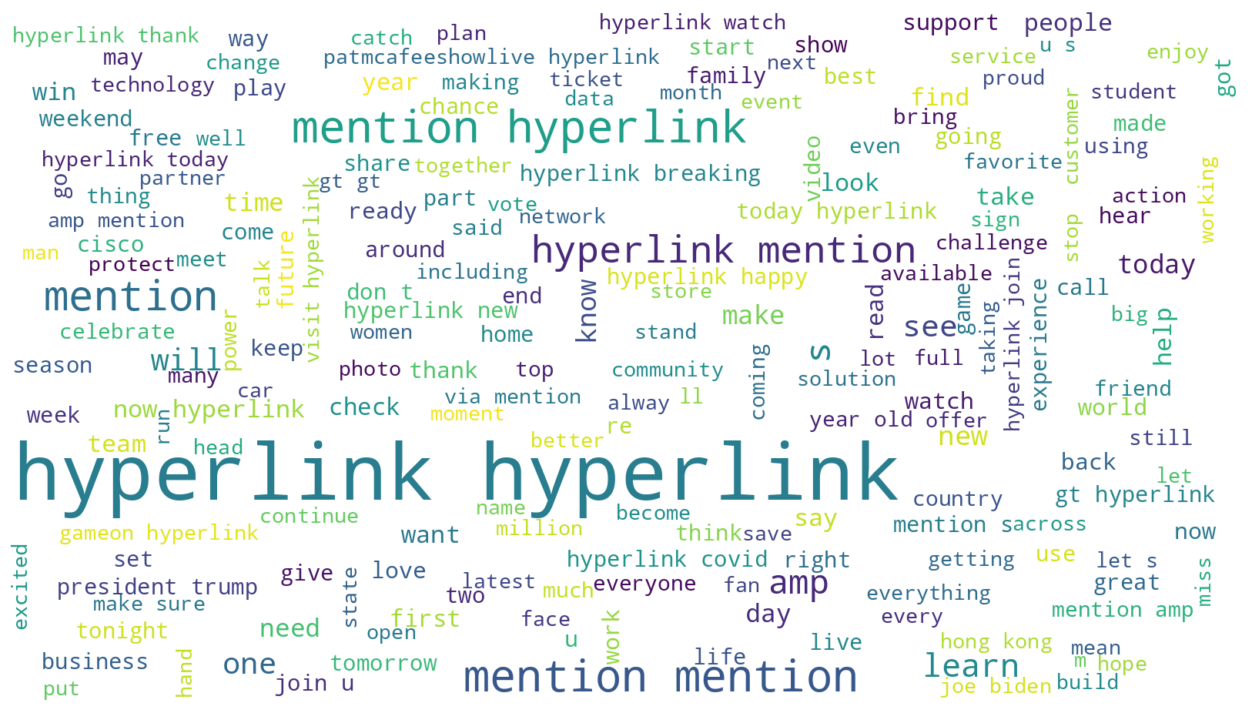

In [24]:
!pip install wordcloud

from wordcloud import WordCloud

text = " ".join(df['content'].tolist())

wordcloud = WordCloud(width= 1600, height = 900, background_color='white').generate(text)

plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

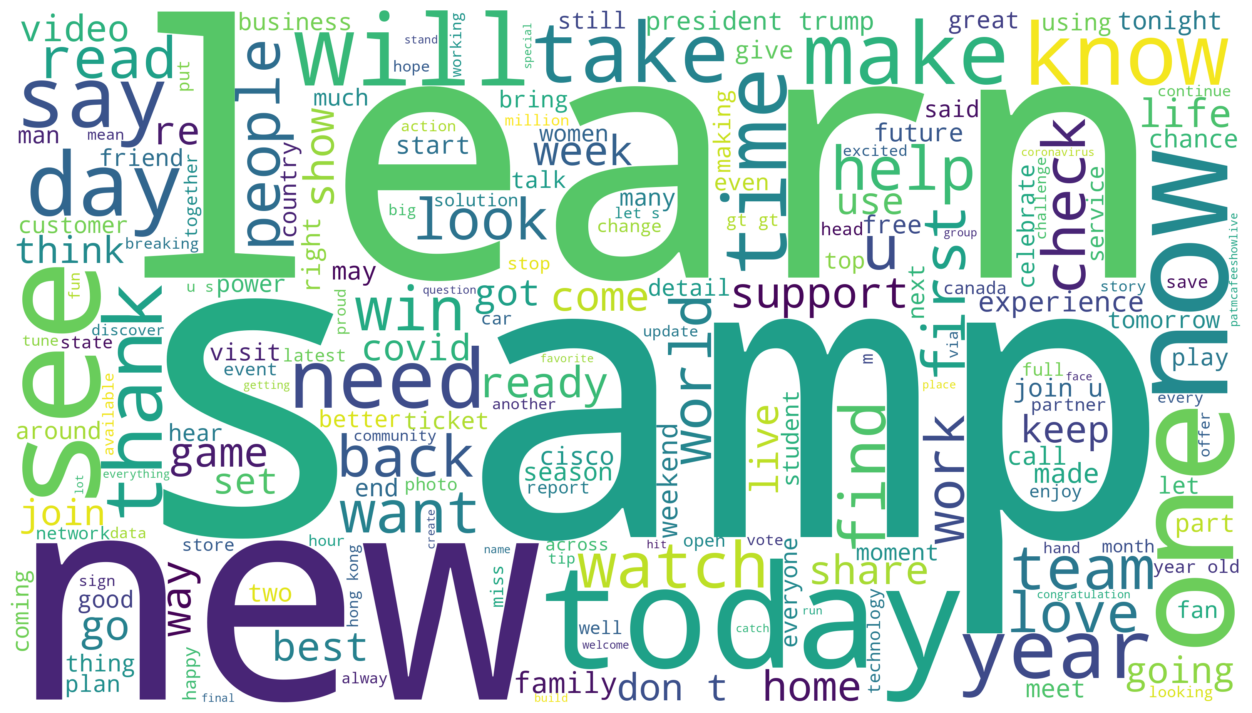

In [25]:
#Removing 'hyperlink' and 'mention' from it
text = re.sub(r'\b(hyperlink|mention)\b', '', text)

wordcloud = WordCloud(width= 3200, height = 1800, background_color='white').generate(text)

plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the WordCloud, it is clear that the most frequent words are derived from adverts/motivational tweets, with imperative words like new, today, know, learn, thank etc.

Political words also make an appearence, with president trump, hong kong, covid, joe biden making an appearence

Let's now extract useful data using NLP principles to feed to the model later.

First we use TextBlob to do sentiment analysis

In [26]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 8.2 MB/s eta 0:00:00


In [27]:
from textblob import TextBlob

def get_sentiment(text):
  analysis = TextBlob(text)
  return analysis.sentiment.polarity, analysis.sentiment.subjectivity

df[['polarity', 'subjectivity']] = df['content'].apply(lambda text: pd.Series(get_sentiment(text)))

df.head(20)

<ipython-input-27-ab2e594f99cd>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[['polarity', 'subjectivity']] = df['content'].apply(lambda text: pd.Series(get_sentiment(text)))
<ipython-input-27-ab2e594f99cd>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[['polarity', 'subjectivity']] = df['content'].apply(lambda text: pd.Series(get_sentiment(text)))


,id,date,likes,content,username,media,inferred company,has_media,datetime,log_likes,hour,day_of_week,word_count,char_count,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,media_type,Gif,Photo,Video,aa,aaa,aarp,accenture,acer,airasia,airtel,alaska airlines,alcoa,allstate,amazon,amc,amd,american express,american family insurance,amp,amtrak,amway,arc,arm,asda,astro,asus,aviva,avon,axa,bacardi,bar,bayer,belk,bell,bic,blackberry,bny mellon,boeing,buffalo wild wings,cameron,cbc,chanel,charles schwab,cisco,cnn,comcast,comcast business,continental,converse,coty,credit suisse,cricket wireless,cvs pharmacy,dairy queen,depaul university,desjardins,dollar general,dominion,dsw,dupont,eaton,emerson,equinox,ericsson,ethiopian airlines,facebook,fc barcelona,fedex,food lion,fred hutch,free,ge healthcare,general mills,general motors,getty images,goldman sachs,greene king,greenpeace,groupon,gsa,gucci,harris teeter,heineken,henry schein,herbalife,hertz,hitachi,hobby lobby,holland america line,home depot,honeywell,hp,hsbc,hubspot,hudson,hugo boss,iberia,ibm,icici bank,ihop,illumina,independent,instagram,john deere,lacoste,lane bryant,lenovo,lg electronics,little caesars pizza,louis vuitton,lufthansa,lyft,malaysia airlines,mastercard,maximus,mayo clinic,mcafee,mcdonalds,meijer,metlife,metro,michelin,microsoft,midea,monster,motorola,movistar,mtn,national geographic,new balance,nn,no,nokia,novartis,oakley,office depot,olive garden,opel,oracle,padi,paramount pictures,paytm,pepsico,petsmart,peugeot,pfizer,philip morris international,pirelli,pizza hut,pm,pnc,puma,qantas,qatar airways,raytheon,red bull,red lobster,renault,restaurant,revlon,rite aid,rockwell automation,rona,rotary international,saab,sabc,saks fifth avenue,samsung,sap,sara lee,scotiabank,sephora,shell,shoprite,shutterstock,siemens,singapore airlines,singtel,spirit airlines,spotify,staples,starbucks,state farm,stryker,sutter health,taco bell,talbots,target,td,tesco,tesla,the body shop,the home depot,tim hortons,tommy hilfiger,total,toyota,trane,travelers,turkish airlines,twitter,ucla health,ulta beauty,unilever,united airlines,united rentals,ups,urban outfitters,usaa,valspar,verizon,virgin media,waitrose,walmart,wells fargo,western union,westfield,williams,wolseley,wwf,yahoo,ymca,zumba,polarity,subjectivity
0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,True,2020-12-12 00:47:00,0.693147,0,Saturday,29,181,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Photo,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175000,0.325000
1,2,2018-06-30 10:04:20,2750,watch rapper <mention> freestyle for over an h...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-06-30 10:04:20,7.919720,10,Saturday,10,73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Photo,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

No we implement TF-IDF to find out how important a word is inside a particular tweet.

Let us use 1000 top words for now, which we can change later to see how our model performs with different number of top important words

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words='english',
    ngram_range=(1, 1)
)

tfidf_matrix = tfidf_vectorizer.fit_transform(df['content'])
prefixed_cols = ['tfidf_' + feat for feat in tfidf_vectorizer.get_feature_names_out()]

df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=prefixed_cols)
df_combined = pd.concat([df, df_tfidf], axis=1)
joblib.dump(tfidf_vectorizer, '/content/drive/My Drive/tfidf_vectorizer.pkl')

['/content/drive/My Drive/tfidf_vectorizer.pkl']

In [32]:
df_combined.head(5)

,id,date,likes,content,username,media,inferred company,has_media,datetime,log_likes,hour,day_of_week,word_count,char_count,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,media_type,Gif,Photo,Video,aa,aaa,aarp,accenture,acer,airasia,airtel,alaska airlines,alcoa,allstate,amazon,amc,amd,american express,american family insurance,amp,amtrak,amway,arc,arm,asda,astro,asus,aviva,avon,axa,bacardi,bar,bayer,belk,bell,bic,blackberry,bny mellon,boeing,buffalo wild wings,cameron,cbc,chanel,charles schwab,cisco,cnn,comcast,comcast business,continental,converse,coty,credit suisse,cricket wireless,cvs pharmacy,dairy queen,depaul university,desjardins,dollar general,dominion,dsw,dupont,eaton,emerson,equinox,ericsson,ethiopian airlines,facebook,fc barcelona,fedex,food lion,fred hutch,free,ge healthcare,general mills,general motors,getty images,goldman sachs,greene king,greenpeace,groupon,gsa,gucci,harris teeter,heineken,henry schein,herbalife,hertz,hitachi,hobby lobby,holland america line,home depot,honeywell,hp,hsbc,hubspot,hudson,hugo boss,iberia,ibm,icici bank,ihop,illumina,independent,instagram,john deere,lacoste,lane bryant,lenovo,lg electronics,little caesars pizza,louis vuitton,lufthansa,lyft,malaysia airlines,mastercard,maximus,mayo clinic,mcafee,mcdonalds,meijer,metlife,metro,michelin,microsoft,midea,monster,motorola,movistar,mtn,national geographic,new balance,nn,no,nokia,novartis,oakley,office depot,olive garden,opel,oracle,padi,paramount pictures,paytm,pepsico,petsmart,peugeot,pfizer,philip morris international,pirelli,pizza hut,pm,pnc,puma,qantas,qatar airways,raytheon,red bull,red lobster,renault,restaurant,revlon,rite aid,rockwell automation,rona,rotary international,saab,sabc,saks fifth avenue,samsung,sap,sara lee,scotiabank,sephora,shell,shoprite,shutterstock,siemens,singapore airlines,singtel,spirit airlines,spotify,staples,starbucks,state farm,stryker,sutter health,taco bell,talbots,target,td,tesco,tesla,the body shop,the home depot,tim hortons,tommy hilfiger,total,toyota,trane,travelers,turkish airlines,twitter,ucla health,ulta beauty,unilever,united airlines,united rentals,ups,urban outfitters,usaa,valspar,verizon,virgin media,waitrose,walmart,wells fargo,western union,westfield,williams,wolseley,wwf,yahoo,ymca,zumba,polarity,subjectivity,tfidf_00,tfidf_000,tfidf_10,tfidf_100,tfidf_11,tfidf_12,tfidf_13,tfidf_14,tfidf_15,tfidf_16,tfidf_17,tfidf_18,tfidf_19,tfidf_1st,tfidf_20,tfidf_2018,tfidf_2019,tfidf_2020,tfidf_21,tfidf_22,tfidf_23,tfidf_24,tfidf_25,tfidf_2nd,tfidf_30,tfidf_40,tfidf_50,tfidf_500,tfidf_5g,tfidf_7daysmagicmoment,tfidf_99,tfidf_aaa,tfidf_able,tfidf_access,tfidf_according,tfidf_account,tfidf_act,tfidf_action,tfidf_add,tfidf_address,tfidf_africa,tfidf_age,tfidf_ago,tfidf_ahead,tfidf_ai,tfidf_air,tfidf_album,tfidf_amazing,tfidf_amazon,tfidf_amc,tfidf_amctheatres,tfidf_america,tfidf_american,tfidf_americans,tfidf_amp,tfidf_anniversary,tfidf_announce,tfidf_announced,tfidf_annual,tfidf_answer,tfidf_antielab,tfidf_apc,tfidf_app,tfidf_applications,tfidf_apply,tfidf_apps,tfidf_april,tfidf_area,tfidf_arm,tfidf_arrested,tfidf_arsenal,tfidf_art,tfidf_ask,tfidf_asked,tfidf_asus,tfidf_attack,tfidf_attacks,tfidf_august,tfidf_australia,tfidf_available,tfidf_avoid,tfidf_award,tfidf_awards,tfidf_away,tfidf_awesome,tfidf_azure,tfidf_baby,tfidf_bad,tfidf_ban,tfidf_bank,tfidf_banking,tfidf_based,tfidf_battery,tfidf_battle,tfidf_beat,tfidf_beautiful,tfidf_begin,tfidf_believe,tfidf_benefits,tfidf_best,tfidf_better,tfidf_biden,tfidf_big,tfidf_biggest,tfidf_billion,tfidf_birthday,tfidf_black,tfidf_blog,tfidf_blue,tfidf_board,tfidf_book,tfidf_booth,tfidf_born,tfidf_boy,tfidf_brand,tfidf_break,tfidf_breaking,tfidf_bring,tfidf_bringing,tfidf_buhari,tfidf_build,tfidf_building,tfidf_built,tfidf_business,tfidf_businesses,tfidf_buy,tfidf_called,tfidf_calling,tfidf_calls,tfidf_came,tfidf_camera,tfidf_campaign,tfidf_canada,tfidf_canadian,tfidf_cancer,tfidf_car,tfidf_card,tfidf_cards,tfidf_care,tfidf_career,tfidf_cars,tfidf_case,tfi

In [34]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

One final thing to do will be one hot encoding the hour of the day. This is important to do so that the model does not associate the higher value of the hours of day with more "importance".

In [37]:
hour_encoder = OneHotEncoder(sparse_output=False)
hour_one_hot_encoded = hour_encoder.fit_transform(df_combined[['hour']])

joblib.dump(hour_encoder, '/content/drive/My Drive/hour_encoder.pkl')

df_combined[hour_encoder.categories_[0]] = hour_one_hot_encoded
df_combined.head(10)

id                 date  likes  \
0   1  2020-12-12 00:47:00      1   
1   2  2018-06-30 10:04:20   2750   
2   3  2020-09-29 19:47:28     57   
3   4  2020-10-01 11:40:09    152   
4   5  2018-10-19 14:30:46     41   
5   6  2020-11-15 16:01:08    525   
6   7  2019-10-24 10:51:03      0   
7   8  2018-07-17 22:04:26      3   
8   9  2019-03-27 12:18:01    572   
9  10  2020-08-01 05:24:03    127   

                                             content        username  \
0  spend your weekend morning with a ham, egg, an...    TimHortonsPH   
1  watch rapper <mention> freestyle for over an h...       IndyMusic   
2  canadian armenian community demands ban on mil...       CBCCanada   
3  1st in europe to be devastated by covid-19, it...  MKWilliamsRome   
4  congratulations to pauletha butts of <mention>...           BGISD   
5  an 85-year-old primary school in shanghai has ...            cnni   
6  lasu celebrates new dawn of unbroken peace as ...  IndependentNGR   
7  next week cncf will be publishing a series of ...      CiscoCloud   
8  a 95-year-old world war ii veteran says he was...            cnni   
9  nicholas hoult, charlize theron, and aisha tyl...        GettyVIP   

                                               media inferred company  \
0  [Photo(previewUrl='https://pbs.twimg.com/media...      tim hortons   
1  [Photo(previewUrl='https://pbs.twimg.com/media...      independent   
2  [Photo(previewUrl='https://pbs.twimg.com/media...              cbc   
3  [Photo(previewUrl='https://pbs.twimg.com/media...         williams   
4  [Photo(previewUrl='https://pbs.twimg.com/media...      independent   
5  [Video(thumbnailUrl='https://pbs.twimg.com/amp...              cnn   
6  [Photo(previewUrl='https://pbs.twimg.com/media...      independent   
7  [Video(thumbnailUrl='https://pbs.twimg.com/amp...            cisco   
8  [Photo(previewUrl='https://pbs.twimg.com/media...              cnn   
9  [Photo(previewUrl='https://pbs.twimg.com/media...     getty images   

   has_media            datetime  log_likes  hour day_of_week  word_count  \
0       True 2020-12-12 00:47:00   0.693147     0    Saturday          29   
1       True 2018-06-30 10:04:20   7.919720    10    Saturday          10   
2       True 2020-09-29 19:47:28   4.060443    19     Tuesday          14   
3       True 2020-10-01 11:40:09   5.030438    11    Thursday          22   
4       True 2018-10-19 14:30:46   3.737670    14      Friday          26   
5       True 2020-11-15 16:01:08   6.265301    16      Sunday          28   
6       True 2019-10-24 10:51:03   0.000000    10    Thursday          16   
7       True 2018-07-17 22:04:26   1.386294    22     Tuesday          35   
8       True 2019-03-27 12:18:01   6.350886    12   Wednesday          36   
9       True 2020-08-01 05:24:03   4.852030     5    Saturday          42   

   char_count  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  \
0         181     0.0     0.0       1.0     0.0       0.0      0.0        0.0   
1          73     0.0     0.0       1.0     0.0       0.0      0.0        0.0   
2         104     0.0     0.0       0.0     0.0       0.0      1.0        0.0   
3         140     0.0     0.0       0.0     0.0       1.0      0.0        0.0   
4         199     1.0     0.0       0.0     0.0       0.0      0.0        0.0   
5         181     0.0     0.0       0.0     1.0       0.0      0.0        0.0   
6         107     0.0     0.0       0.0     0.0       1.0      0.0        0.0   
7         241     0.0     0.0       0.0     0.0       0.0      1.0        0.0   
8         224     0.0     0.0       0.0     0.0       0.0      0.0        1.0   
9         274     0.0     0.0       1.0     0.0       0.0      0.0        0.0   

  media_type  Gif  Photo  Video   aa  aaa  aarp  accenture  acer  airasia  \
0      Photo  0.0    1.0    0.0  0.0  0.0   0.0        0.0   0.0      0.0   
1      Photo  0.0    1.0    0.0  0.0  0.0   0.0        0.0   0.0      0.0   
2      Photo  0.0    1.0   

In [38]:
print(df_combined.shape)

(300000, 1271)


We have ~1200 features ready for use in a model. For 300k training examples, this is perfectly fine, but we may use PCA later to optimize the number of features to improve model performance if required

Now let's save the final dataset for further analysis and use

In [39]:
df_combined.to_csv('/content/drive/My Drive/dataset_final.csv', index=False)

Throughout the pipeline, the One_Hot_Encoders and the tfidf_vectorizer have been exported safely, which will allow us to transform incoming data to the API in such a manner as to ensure consistency of features across the training set and the prediction_dataset. The API plan is enclosed in API.py